$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1600x_2^2 + 4x_1 x_2 +  x_1^2$.

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function.

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite.

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




In [ ]:
import numpy as np

def evalh(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  H = [[2,4],[4,3200]]
  return H

def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  ev,evs = np.linalg.eig(A)
  return max(ev)/min(ev)

The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point.

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$.

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent?

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$.

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes:


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k})
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k})
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$.

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution.




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\
&\quad \quad k = {k+1} \\
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

Condition number of matrix $\mathbf{Q}$ needs to be analyzed in new gradient scheme with scaling  with $\mathbf{D}^k$ \\

$\mathbf{Q}$  = $(\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}$

Where, $\mathbf{H}^k = (\nabla^2f(\mathbf{x})) $ is the hessian of a function at each iteration.

$\mathbf{D}^k$ is shown in the question 5 below.

Condition Number of matrix $\mathbf{Q}$ in the Gradient Descent Scheme has reduced to nearly $1$ due to such choice of matrix $\mathbf{Q}$ so that our gradient descent  algorithm with scaling becomes more accurate and fast.


 Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)? \\
#Answer:
Diagonal approximation to the Hessian matrix $\nabla^2f( \mathbf{x})$, i.e., the diagonal matrix $\mathbf{D}^k$ that has the inverse second partial derivatives $\Big(\frac{\partial^2f(\mathbf{x_k})}{(\partial x_i)^2}\Big)^{-1}$ along the diagonal. This improves the performance of the gradient method dramatically, by providing automatic scaling of the units in which the components $x_i$ of $\mathbf{x}$ are measured. Because of such choice of $\mathbf{D}^k$, the condition number of $\mathbf{Q}$ is improving and becoming so close to $1$ so that our gradient descent scheme is converging so quickly. Here, product with inverse of diagonal elements of hessian matrix with hessian matrix is causing the improvements in $\mathbf{Q}$ by becoming so close to condition number of identity matrix. This is so helpful in fasterness of the algorithm.

$\therefore \mathbf{D^k} =
\begin{bmatrix}
  \frac{1}{2} & 0 \\ 0 & \frac{1}{3200}
\end{bmatrix}$

In [ ]:
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  return np.array([[1/2,0],[0,1/3200]])


In [ ]:
def evalf(x):
  assert type(x) is np.ndarray and len(x) == 2
  return 1600*x[1]**2 + 4*x[0]*x[1] + x[0]**2

In [ ]:
def evalg(x):
  assert type(x) is np.ndarray and len(x) == 2
  return np.array([(2*x[0]+4*x[1]),(4*x[0]+3200*x[1])])


In [ ]:
def compute_steplength_exact(gradf, A):
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2
  step_length = np.dot(gradf,gradf)/np.dot(gradf,np.matmul(2*A,gradf))
  return step_length


In [ ]:
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p=-evalg(x)
  while evalf(x+alpha*p)>evalf(x)+gamma*alpha*np.dot(evalg(x),p):
    alpha = rho*alpha

  return alpha

In [ ]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma):
  assert type(x) is np.ndarray and len(gradf) == 2
  assert type(gradf) is np.ndarray and len(gradf) == 2
  assert type(direction) is np.ndarray and len(direction) == 2
  assert type(alpha_start) is float and alpha_start>=0.
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  p=-gradf
  alpha=alpha_start
  D_k=compute_D_k(x)

  while evalf(x+alpha*np.matmul(D_k,p))>evalf(x)+gamma*alpha*np.matmul(np.matrix.transpose(gradf),np.matmul(D_k,p)):
    alpha = rho*alpha

  return alpha

In [ ]:
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [ ]:
def find_minimizer_gd(start_x, tol, line_search_type,*args):

  assert type(start_x) is np.ndarray and len(start_x) == 2
  assert type(tol) is float and tol>=0
  A = np.array([[2, 4],[4,3200]])
  x = start_x
  g_x = evalg(x)
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0

  while (np.linalg.norm(g_x) > tol):
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A)

    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1

    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, np.multiply(step_length,g_x))
    k += 1
    g_x = evalg(x)


  return x , k , evalf(x)


In [ ]:
def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):

  assert type(start_x) is np.ndarray and len(start_x) == 2
  assert type(tol) is float and tol>=0
  A = np.array([[2, 4],[4,3200]])
  x = start_x
  g_x = evalg(x)
  D_k=compute_D_k(x)

  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]

  k = 0

  while (np.linalg.norm(g_x) > tol):
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A)

    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma)

    elif line_search_type == CONSTANT_STEP_LENGTH:
      step_length = 0.1
    else:
      raise ValueError('Line search type unknown. Please check!')

    x = np.subtract(x, np.multiply(step_length,np.matmul(D_k,g_x)))
    k += 1
    g_x = evalg(x)

  return x , k , evalf(x)


In [ ]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

Observation : \\
Number of iterations for Gradient Descent with backtracking line search with scaling are very much as compared to number of iterations without scaling.And we dont see any major change effect on number of iterations w.r.t. change in value of alpha.

In [ ]:
rho_values=[0.9,0.8,0.75,0.6,0.5,0.4,0.25,0.1,0.01]
alpha_start=1.0
gamma=0.5
obj_function=[]
final_minimizer=[]
number_of_iterations=[]
print("For Gradient Descent with backtracking line search:")
for rho in rho_values:
  print("for rho = ",rho)
  optimizer_bls,k_bls,min_value_bls=find_minimizer_gd(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  print("   Minimizer Value :",optimizer_bls,"   Number of iterations :",k_bls,"   Minimum value : ",min_value_bls)
  number_of_iterations.append(k_bls)
  obj_function.append(min_value_bls)
  final_minimizer.append(optimizer_bls)

For Gradient Descent with backtracking line search:
for rho =  0.9
   Minimizer Value : [-4.86897154e-13  5.56578299e-16]    Number of iterations : 3583    Minimum value :  2.364805000795663e-25
for rho =  0.8
   Minimizer Value : [-4.79006925e-13  5.77859847e-16]    Number of iterations : 1331    Minimum value :  2.2887471356620955e-25
for rho =  0.75
   Minimizer Value : [-4.12345553e-13  4.98693146e-16]    Number of iterations : 538    Minimum value :  1.6960423093180598e-25
for rho =  0.6
   Minimizer Value : [-4.86809153e-13  6.52330287e-16]    Number of iterations : 5615    Minimum value :  2.363937657228955e-25
for rho =  0.5
   Minimizer Value : [-4.77038750e-13  6.86254384e-16]    Number of iterations : 16981    Minimum value :  2.2701000104598094e-25
for rho =  0.4
   Minimizer Value : [-4.92016016e-13  6.63916164e-16]    Number of iterations : 5961    Minimum value :  2.414783857100508e-25
for rho =  0.25
   Minimizer Value : [-4.78952422e-13  5.09080727e-16]    Number of it

In [ ]:
obj_function_scaling=[]
final_minimizer_scaling=[]
number_of_iterations_scaling=[]
print("For Gradient Descent with backtracking line search with scaling:")
for rho in rho_values:
  print("for rho = ",rho)
  opt_bls_scaling,k_scaling,fun_scaling = find_minimizer_gdscaling(my_start_x, my_tol, BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  print("   Minimizer Value :",opt_bls_scaling,"   Number of iterations :",k_scaling,"   Minimum value : ",fun_scaling)
  obj_function_scaling.append(fun_scaling)
  final_minimizer_scaling.append(opt_bls_scaling)
  number_of_iterations_scaling.append(k_scaling)

For Gradient Descent with backtracking line search with scaling:
for rho =  0.9
   Minimizer Value : [-1.28638841e-14  3.28433470e-16]    Number of iterations : 151937    Minimum value :  3.211694635438895e-28
for rho =  0.8
   Minimizer Value : [-1.28648842e-14  3.28459725e-16]    Number of iterations : 175394    Minimum value :  3.2122012616482217e-28
for rho =  0.75
   Minimizer Value : [-1.28650411e-14  3.28464095e-16]    Number of iterations : 191237    Minimum value :  3.212283251452544e-28
for rho =  0.6
   Minimizer Value : [-1.28648002e-14  3.28457203e-16]    Number of iterations : 161406    Minimum value :  3.212155533584296e-28
for rho =  0.5
   Minimizer Value : [-1.28656639e-14  3.28479932e-16]    Number of iterations : 186512    Minimum value :  3.212593624272809e-28
for rho =  0.4
   Minimizer Value : [-1.28635904e-14  3.28426577e-16]    Number of iterations : 173702    Minimum value :  3.2115540377287654e-28
for rho =  0.25
   Minimizer Value : [-1.28656639e-14  3.28479

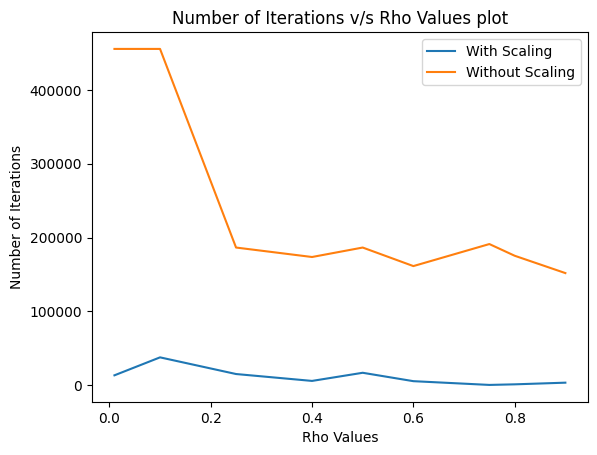

In [ ]:
import matplotlib.pyplot as plt

plt.plot(rho_values,number_of_iterations)
plt.plot(rho_values,number_of_iterations_scaling)
plt.xlabel('Rho Values')
plt.ylabel('Number of Iterations')
plt.title('Number of Iterations v/s Rho Values plot')
plt.legend(["With Scaling","Without Scaling"])
plt.show()

Observation : \\
Number of iterations for Gradient Descent with backtracking line search with scaling are very much as compared to number of iterations without scaling.For Gradient Descnt with backtracking line search With scaling with increase in rho values number of iterations decreases ,initially we can see a very much change in number of iterations from 0.0 to 0.2 and then it decreases minorly.

[]


IndexError: list index out of range

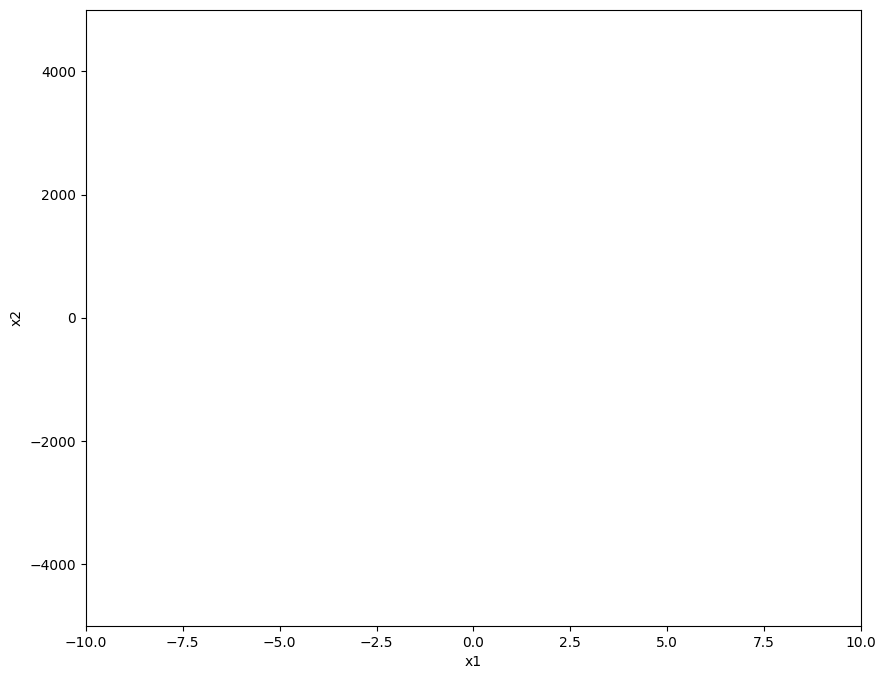

In [ ]:
my_start_x = np.array([1, 4000])
my_tol = 1e-12
BACKTRACKING_LINE_SEARCH = True
alpha_start = 1.0
gamma = 0.5
rho_values = [0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01]

# Lists to store results
obj_function_values = []
final_minimizer_values = []
number_of_iterations_values = []

x_vals = np.linspace(-10, 10, 100)
y_vals = np.linspace(-5000, 5000, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = obj_function(np.vstack([X.ravel(), Y.ravel()])).reshape(X.shape)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")
plt.xlabel("x1")
plt.ylabel("x2")
print(obj_function_values)
# Plot optimization trajectory for each rho value
for i, rho in enumerate(rho_values):
    trajectory_x = [point[0] for point in obj_function_values[i]]
    trajectory_y = [point[1] for point in obj_function_values[i]]
    plt.plot(trajectory_x, trajectory_y, label=f"rho={rho}")

plt.scatter(final_minimizer_values[-1][0], final_minimizer_values[-1][1], color="red", marker="*", label="Final Minimizer")

plt.legend()
plt.title("Gradient Descent with Backtracking Line Search: Level Sets and Optimization Trajectory")
plt.show()
